# Løsningsforslag: Oppgaver fra 15. januar
*22. januar 2024*

### Fra forrige gang
- Innlesing av data 
- Plotting 

### Oppgavetekst
**a)** Last ned filen "bestsellers with categories.xls" [her](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019), og les den inn med pandas.

**b)** Behandling av data:
- Datasettet har noen bøker med flere ganger. Fjern duplikatene med `.drop_duplicates("Name")`
- Fjern navnet på boken og forfatteren fra dataen
- Fjern alle bøker med mindre enn 1000 anmeldelser

**c)** Plot 
- Gjennomsnittlig anmeldelsesskårer for fiksjon og sakprosa
- Gjennomsnittlig anmeldelsesskårer for hvert utgivelsesår.
- Antall bøker for hver score
- Antall anmeldelser for hver score

**d)** Hvor mange fiksjonsbøker fra 2017 fikk en score bedre enn 4.6?

### a) Laste ned fila
Dette kan dere gjøre på forskjellige måter, men pass på at filen ender opp på et fornuftig sted. Senere i dag skal vi se på hvilken mappestruktur vi bør ha, og hvor vi som standard bør legge slike filer. Jeg har lagt den i en mappe som jeg kaller "data", i samme mappe som jeg legger notebook'en min. Uansett: Først laster vi ned fila, så leser vi den inn.

### b) Rydde i data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Les inn fila 
df = pd.read_csv("../../data/bestsellers_with_categories.csv")

# Drop duplicates (B1)
# Merk at denne operasjonen ikke endrer på dataframet selv, så vi må ta imot returvariabelen fra operasjonen
df_no_duplicates = df.drop_duplicates("Name")

# Fjerne bok og forfatter (B2)
df_dropped = df_no_duplicates.drop(columns=["Name", "Author"])

# Fjerne alle med mindre enn 1000 anmeldelser (B3)
more_than_1000_ind = df_dropped["Reviews"]>1000
df_more_than_1000 = df_dropped[more_than_1000_ind]

### c) Plotte

<Axes: xlabel='Year'>

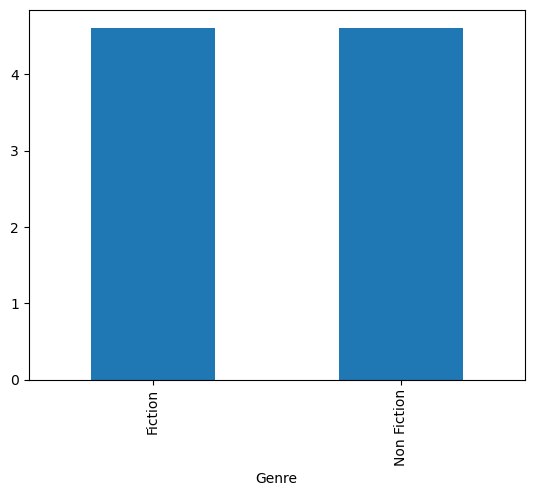

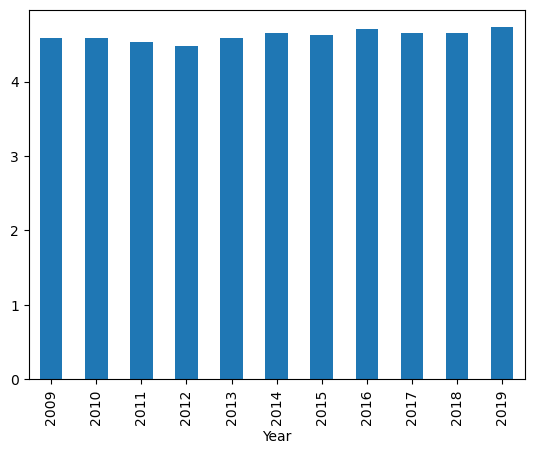

In [2]:
#Altså, dette kan vi gjøre på flere måter, men dette fungerer jo, og er nok den beste måten.. 
# Vise denne operasjonen punktum for punktum innover i kommandoen..
import matplotlib.pyplot as plt
df_more_than_1000.groupby("Genre")["User Rating"].mean().plot.bar()
plt.figure()
df_more_than_1000.groupby("Year")["User Rating"].mean().plot.bar()

<Axes: xlabel='User Rating'>

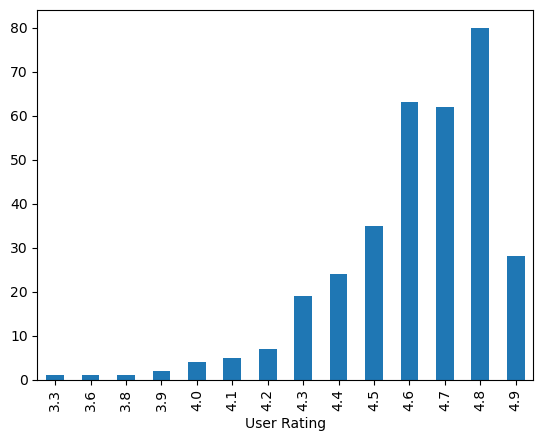

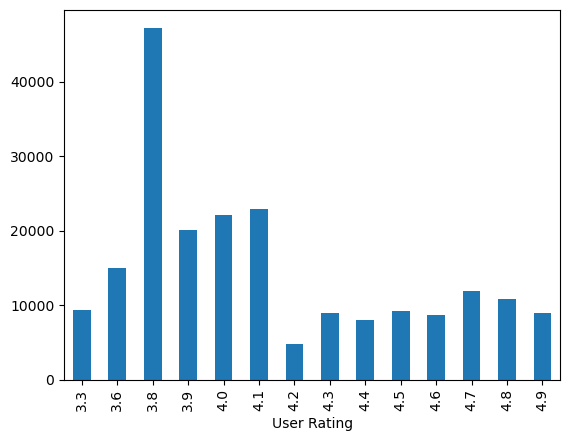

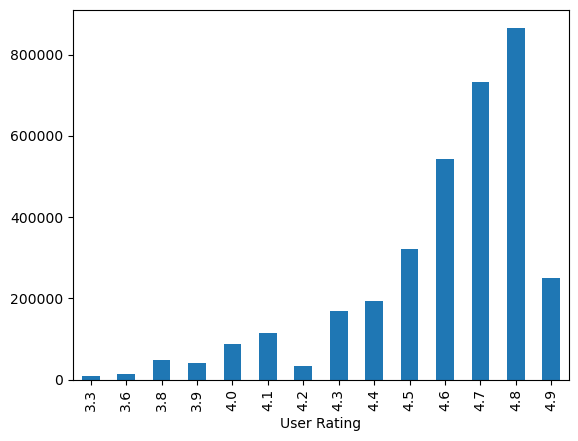

In [3]:
import matplotlib.pyplot as plt 

# Hvor mange bøker har de og de skårene? 
df_more_than_1000.groupby("User Rating")["Reviews"].count().plot.bar()

# Hvor mange reviews pleier bøkene på en gitt skår å ha?
plt.figure()
df_more_than_1000.groupby("User Rating")["Reviews"].mean().plot.bar()

# Alternativt, hvor mange reviews har alle bøkene på en gitt skår til sammen? 
plt.figure()
df_more_than_1000.groupby("User Rating")["Reviews"].sum().plot.bar()

In [4]:
selection_df_2017 = df_more_than_1000[df_more_than_1000["Year"] == 2017]
selection_df_2017[selection_df_2017["User Rating"] >= 4.6].count()

User Rating    20
Reviews        20
Price          20
Year           20
Genre          20
dtype: int64

Svaret er 20